<a href="https://colab.research.google.com/github/lmartinelli71/lmartinelli71/blob/main/Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importacion y tratamiento inicial de datos

In [ ]:
import urllib.request
from zipfile import ZipFile
import pandas as pd
import missingno as msno # librería para tratamiento de datos perdidos
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
#Importamos el archivo desde la web
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00365/data.zip'

# descargamos y salvamos el archivo comprimido
filename, headers = urllib.request.urlretrieve(url, 'data.zip')

# Descomprimimos el archivo comprimido (que contiene varios archivos .arff)
with ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
#armamos un array con los nombres de los archivos que uniremos en un dataframe
files = []
for i in range(1, 6):
    counter = str(i)
    name = counter + 'year.arff'
    files.append(name)
print("Files: ", files)

Files:  ['1year.arff', '2year.arff', '3year.arff', '4year.arff', '5year.arff']


In [ ]:
#Se unen los 5 archivos
from scipy.io import arff
file_data = []
for file in files:
    file_data.append(arff.loadarff(file))

In [ ]:
#Armamos el dataframe de trabajo con toda la informacion
for i in range(0, len(file_data)):
    if i==0:
        df = pd.DataFrame.from_records(data = file_data[i][0])
        continue
    if i!=0:
        d = pd.DataFrame.from_records(data = file_data[i][0])
        df = df.append(d)

<ipython-input-6-4ba34f72be2d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d)
<ipython-input-6-4ba34f72be2d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d)
<ipython-input-6-4ba34f72be2d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d)
<ipython-input-6-4ba34f72be2d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d)


In [ ]:
df.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [ ]:
df.shape

(43405, 65)

In [ ]:
#pasamos class a entero
df.columns = map(str.lower, df.columns)
df['class'] = df['class'].astype('int')
df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [ ]:
#vemos todas las variables , se observa que con excepcion de Class el resto es de tipo float
pd.set_option('display.max_rows', None)
df.dtypes

attr1     float64
attr2     float64
attr3     float64
attr4     float64
attr5     float64
attr6     float64
attr7     float64
attr8     float64
attr9     float64
attr10    float64
attr11    float64
attr12    float64
attr13    float64
attr14    float64
attr15    float64
attr16    float64
attr17    float64
attr18    float64
attr19    float64
attr20    float64
attr21    float64
attr22    float64
attr23    float64
attr24    float64
attr25    float64
attr26    float64
attr27    float64
attr28    float64
attr29    float64
attr30    float64
attr31    float64
attr32    float64
attr33    float64
attr34    float64
attr35    float64
attr36    float64
attr37    float64
attr38    float64
attr39    float64
attr40    float64
attr41    float64
attr42    float64
attr43    float64
attr44    float64
attr45    float64
attr46    float64
attr47    float64
attr48    float64
attr49    float64
attr50    float64
attr51    float64
attr52    float64
attr53    float64
attr54    float64
attr55    float64
attr56    

In [ ]:
#eliminamos el indice
df.reset_index
df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [ ]:
df.columns

Index(['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'attr7', 'attr8',
       'attr9', 'attr10', 'attr11', 'attr12', 'attr13', 'attr14', 'attr15',
       'attr16', 'attr17', 'attr18', 'attr19', 'attr20', 'attr21', 'attr22',
       'attr23', 'attr24', 'attr25', 'attr26', 'attr27', 'attr28', 'attr29',
       'attr30', 'attr31', 'attr32', 'attr33', 'attr34', 'attr35', 'attr36',
       'attr37', 'attr38', 'attr39', 'attr40', 'attr41', 'attr42', 'attr43',
       'attr44', 'attr45', 'attr46', 'attr47', 'attr48', 'attr49', 'attr50',
       'attr51', 'attr52', 'attr53', 'attr54', 'attr55', 'attr56', 'attr57',
       'attr58', 'attr59', 'attr60', 'attr61', 'attr62', 'attr63', 'attr64',
       'class'],
      dtype='object')

Se renombran las columnas con la denominacion original del dataframe

In [ ]:
# Obtener una lista con los nombres de columna existentes
columnas_actuales = list(df.columns)

In [ ]:
# Crear una lista con los nuevos nombres de columna x1, x2, ..., x64
nuevas_columnas = ['X' + str(i) for i in range(1, 66)]

In [ ]:
# Crear un diccionario que mapee los nombres de columna existentes a los nuevos nombres
mapeo_columnas = {columnas_actuales[i]: nuevas_columnas[i] for i in range(len(columnas_actuales))}

In [ ]:
df = df.rename(columns=mapeo_columnas)
df = df.rename(columns={'X65': 'Class'})

In [ ]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


## Tratamiento de valores nulos y analisis descriptivo

In [ ]:
# explorando la cantidad de valores perdidos en las variables
df.isna().sum()/df.shape[0]*100

X1        0.018431
X2        0.018431
X3        0.018431
X4        0.308720
X5        0.205046
X6        0.018431
X7        0.018431
X8        0.216565
X9        0.020735
X10       0.018431
X11       0.101371
X12       0.308720
X13       0.292593
X14       0.018431
X15       0.082940
X16       0.218869
X17       0.216565
X18       0.018431
X19       0.294897
X20       0.292593
X21      13.486925
X22       0.018431
X23       0.292593
X24       2.124179
X25       0.018431
X26       0.218869
X27       6.367930
X28       1.870752
X29       0.018431
X30       0.292593
X31       0.292593
X32       0.847829
X33       0.308720
X34       0.216565
X35       0.018431
X36       0.018431
X37      43.736897
X38       0.018431
X39       0.292593
X40       0.308720
X41       1.737127
X42       0.292593
X43       0.292593
X44       0.292593
X45       4.946435
X46       0.311024
X47       0.684253
X48       0.020735
X49       0.292593
X50       0.216565
X51       0.018431
X52       0.693468
X53       1.

<Axes: >

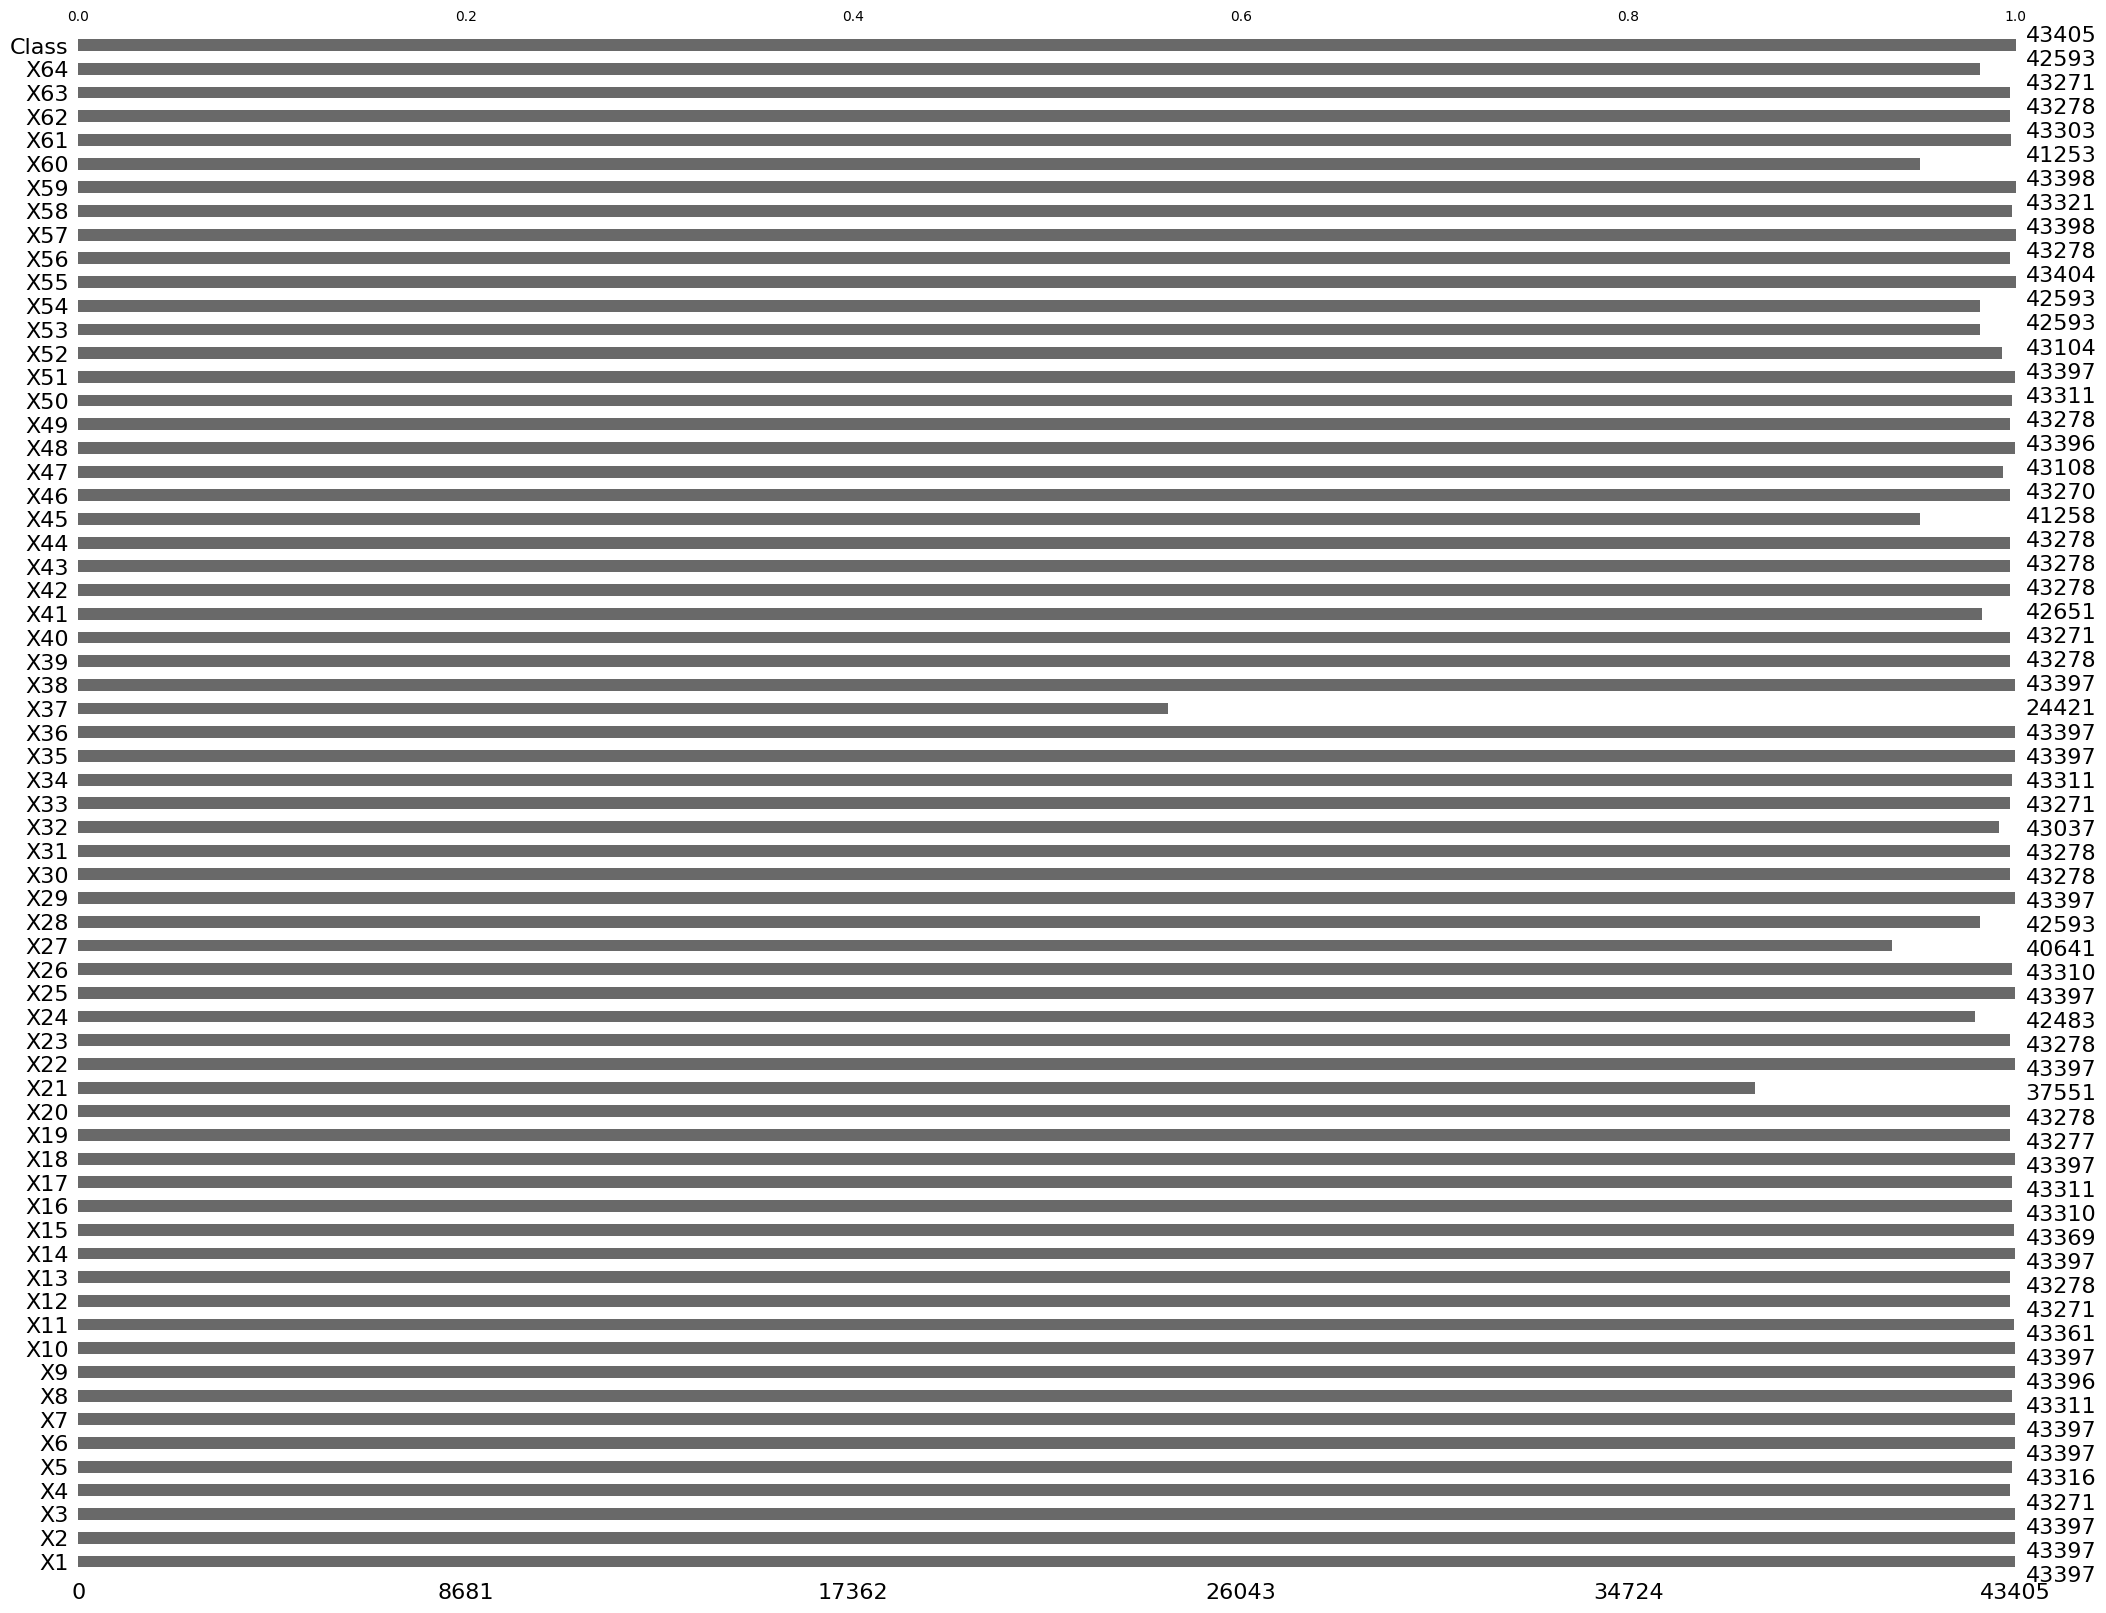

In [ ]:
#en el diagrama se observan las variables con mayor cantidad de valores perdidos es X37 ( (current assets - inventories) / long-term liabilities)
msno.bar(df)

Asignacion de la media a los valores nulos

In [ ]:
#Asignamos la media a los valores faltantes
df = df.fillna(df.mean())
df.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Class
count,43405.000000,43405.000000,43405.000000,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,...,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,0.048174
std,2.993833,5.842209,5.438928,294.978029,6.118020e+04,7.200663,5.712548,505.346176,62.926207,14.669245,...,5.320062e+03,13.672969,5.329289e+03,122.094599,3.153355e+04,552.399187,1.390628e+05,123.985521,2347.072100,0.214137
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000
25%,0.003434,0.269010,0.021540,1.050800,-4.949000e+01,0.000000,0.005783,0.431070,1.018500,0.295530,...,8.959000e-03,0.014632,8.755400e-01,0.000000,5.729400e+00,4.515600,4.220500e+01,3.100200,2.207800,0.000000
50%,0.049636,0.471940,0.196580,1.574000,-1.184000e+00,0.000000,0.059653,1.074100,1.195500,0.505990,...,5.270100e-02,0.119650,9.511200e-01,0.006389,1.040000e+01,6.649500,7.153500e+01,5.102900,4.389200,0.000000
75%,0.129560,0.688270,0.403260,2.806000,5.046100e+01,0.089441,0.150810,2.639100,2.063000,0.709090,...,1.287800e-01,0.284570,9.928000e-01,0.236280,2.389000e+01,10.443000,1.177400e+02,8.650900,10.461000,0.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000


## Separacion entre conjunto de entrenamiento y de prueba (300 registros)

1.   Separar al azar el dataset en un conjunto de entrenamiento y en otro conjunto que no se use para entrenar. Se pide que este segundo conjunto tenga 300 observaciones.

In [ ]:
#Dropeamos la variable dependiente del conjunto de variables independientes
X = df.drop('Class', axis=1)
y= df['Class']

In [ ]:
#Comprobamos que las clases estan desbalanceadas
from collections import Counter
frecuencias = Counter(df['Class'])
print(frecuencias)

Counter({0: 41314, 1: 2091})


In [ ]:
#Dividimos los datos utilizando el parámetro de estratificación = y
#esto es para asegurarnos que la distribución de clases en la variable objetivo se mantenga constante durante la división.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=300, stratify=y, random_state = 0)

## Modelo Bayes Ingenuo (evaluanos accuracy)

In [ ]:
#Se importan las librerias para entrenar un modelo naive bayes
from sklearn.naive_bayes import GaussianNB


In [ ]:
# Se crea un clasificador Naive Bayes y se lo entrena en los datos de entrenamiento
nb = GaussianNB(var_smoothing=0.6)
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.6)

In [ ]:
# Se hacen predicciones en los datos de prueba
y_pred = nb.predict(X_test)

In [ ]:
# Se evalua la precisión del clasificador
accuracy = nb.score(X_test, y_test)
print("Precisión: {:.2f}%".format(accuracy * 100))

Precisión: 95.33%


## Modelo de vecinos mas cercanos con datos sin escalar y escalados (evaluamos accuracy)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score #para hacer cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score, accuracy_score,f1_score,classification_report, confusion_matrix # para obtener la matriz de confusion y métricas derivadas  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Vamos a trabajar con la función KNeighborsClassifier de la librería scikit-learn
# Creamos el modelo KNN con k = 3
model = KNeighborsClassifier(n_neighbors=3)

# Entrenamos el modelo
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Realizamos predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
#Accuracy
accuracy_score(y_test,y_pred)# pasamos como argumento de la matriz de confusión los valores  y_test y los predichos por el modelo

0.9433333333333334

Mismo ejercicio (3 vecinos mas cercanos) con datos escalados. Da mejor accuracy

In [ ]:
#escalamos los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
#Dividimos los datos escalados utilizando el parámetro de estratificación = y esto
#es para asegurarnos que la distribución de clases en la variable objetivo se mantenga constante durante la división.

X_train_esc, X_test_esc, y_train_esc, y_test_esc = train_test_split(X_std, y, test_size=300, stratify=y, random_state = 0)

In [ ]:
model_esc = KNeighborsClassifier(n_neighbors=3)
# Entrenamos el modelo
model_esc.fit(X_train_esc, y_train_esc)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Realizamos predicciones sobre el conjunto de prueba escalado
y_pred_esc = model.predict(X_test_esc)

In [ ]:
#Accuracy con datos escalados
accuracy_score(y_test_esc,y_pred_esc)

0.9533333333333334

KNN variando el numero de vecinos mas cercanos entre 3 y 11 para hallar el optimo bajo esta condicion y el resto de los parametros constantes.
No aplicamos cross validation y trabajamos con los datos escalados.
Usamos datos escalados (que da mejor accuracy segun vimos en el inciso anterior)
Se observa que el accuracy es el mismo sin importar la cantidad de vecimos. Por lo tanto dejamos el parametro k=3


In [ ]:
# Creamos una lista de valores de k para KNN
k_list = list(range(3, 11))

# Creamos 2 listas "vacías" para guardar los resultados de rendimiento y sus desviaciones estándar
accuracy = []
std_dev = []

# Para aplicar KNN para los distintos valores de K hacemos un for
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_esc, y_train_esc)
    scores=accuracy_score(y_test_esc,y_pred_esc)
    accuracy.append(scores.mean())
    std_dev.append(scores.std())

accuracy

[0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334]

Las variables tienen la cantidad maxima de valores perdidos
X37: (current assets - inventories) / long-term liabilities
X21: sales (n) / sales (n-1)

##Modelos árbol de decisión y un random forest

## 1- Análisis exploratorio de datos
## 2- Limpieza y sanidad de la base

In [ ]:
#primera observacion de las variables que contiene el df y sus tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      43405 non-null  float64
 1   X2      43405 non-null  float64
 2   X3      43405 non-null  float64
 3   X4      43405 non-null  float64
 4   X5      43405 non-null  float64
 5   X6      43405 non-null  float64
 6   X7      43405 non-null  float64
 7   X8      43405 non-null  float64
 8   X9      43405 non-null  float64
 9   X10     43405 non-null  float64
 10  X11     43405 non-null  float64
 11  X12     43405 non-null  float64
 12  X13     43405 non-null  float64
 13  X14     43405 non-null  float64
 14  X15     43405 non-null  float64
 15  X16     43405 non-null  float64
 16  X17     43405 non-null  float64
 17  X18     43405 non-null  float64
 18  X19     43405 non-null  float64
 19  X20     43405 non-null  float64
 20  X21     43405 non-null  float64
 21  X22     43405 non-null  float64
 22 

In [ ]:
#Para analisis exploratorio de datos creamos un profiling report de los mismos
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Class
count,43405.000000,43405.000000,43405.000000,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,...,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,0.048174
std,2.993833,5.842209,5.438928,294.978029,6.118020e+04,7.200663,5.712548,505.346176,62.926207,14.669245,...,5.320062e+03,13.672969,5.329289e+03,122.094599,3.153355e+04,552.399187,1.390628e+05,123.985521,2347.072100,0.214137
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000
25%,0.003434,0.269010,0.021540,1.050800,-4.949000e+01,0.000000,0.005783,0.431070,1.018500,0.295530,...,8.959000e-03,0.014632,8.755400e-01,0.000000,5.729400e+00,4.515600,4.220500e+01,3.100200,2.207800,0.000000
50%,0.049636,0.471940,0.196580,1.574000,-1.184000e+00,0.000000,0.059653,1.074100,1.195500,0.505990,...,5.270100e-02,0.119650,9.511200e-01,0.006389,1.040000e+01,6.649500,7.153500e+01,5.102900,4.389200,0.000000
75%,0.129560,0.688270,0.403260,2.806000,5.046100e+01,0.089441,0.150810,2.639100,2.063000,0.709090,...,1.287800e-01,0.284570,9.928000e-01,0.236280,2.389000e+01,10.443000,1.177400e+02,8.650900,10.461000,0.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000


Limpieza y sanidad de la base
Mas arriba se reemplazan los valores faltantes por los valores medios de cada variable

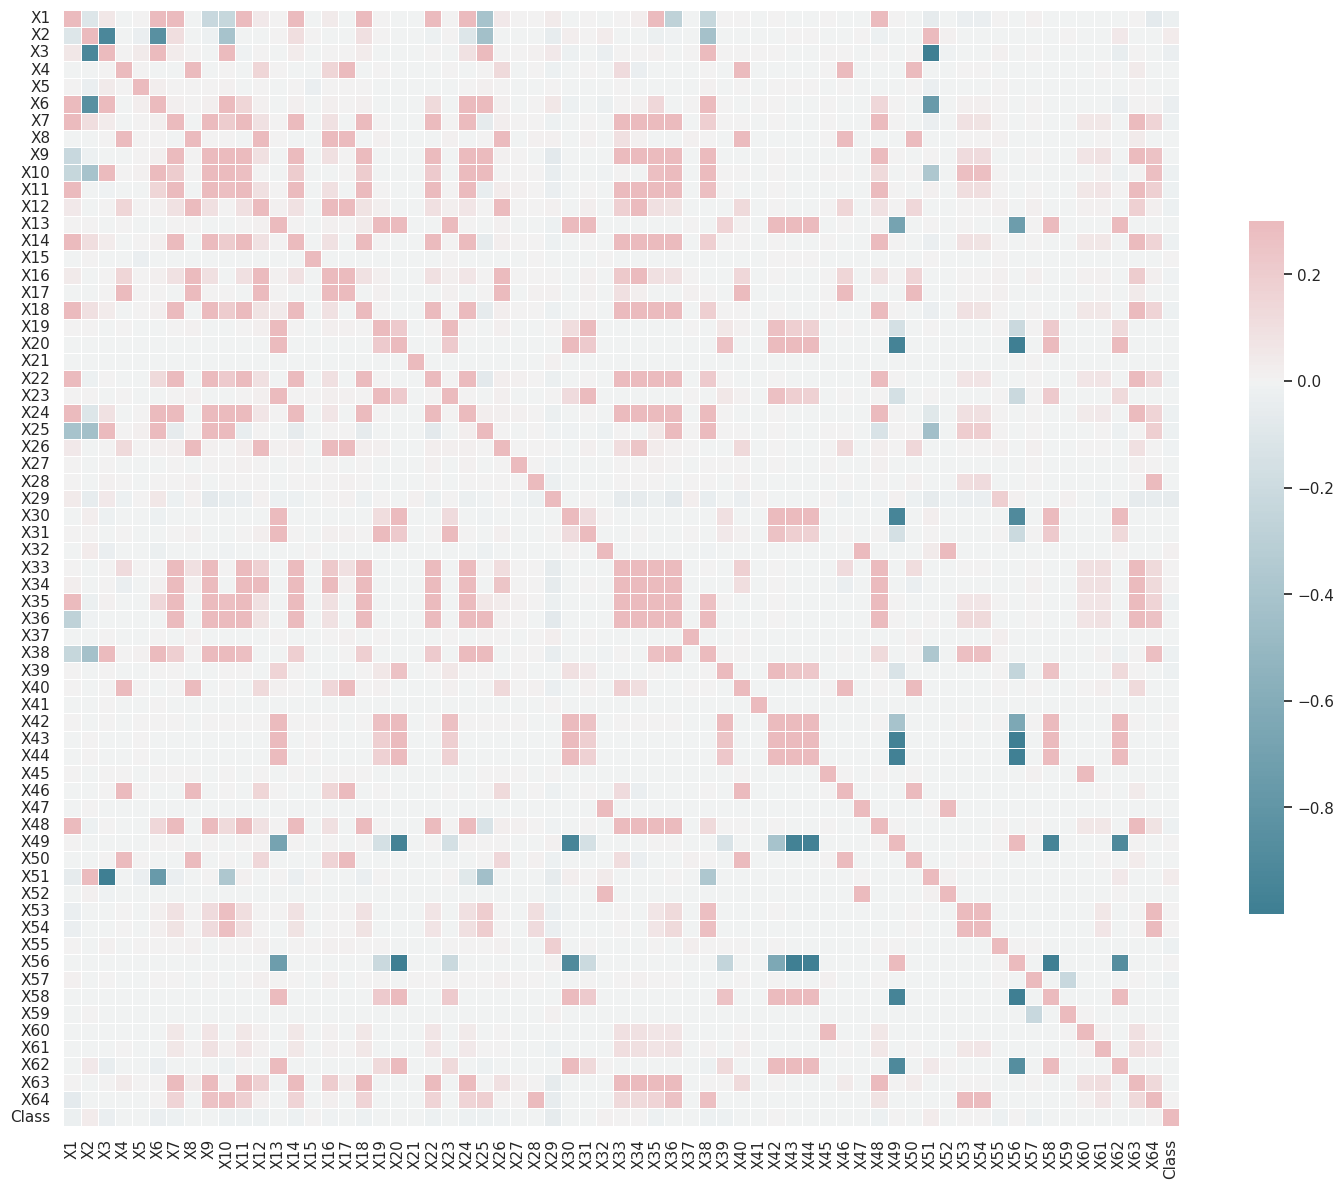

In [ ]:
#Hacemos el diagrama de correlacion para ver la correlacion entre las variables
sns.set(style="white")
corr = df.corr()
f, ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Arboles de decision- Usamos datos escalados con 2 esquemas diferentes de cross validation 1) StratifiedKFold (mas adecuado para datos desbalanceados) y 2) kfold menos adecuado cuando nos preocupa la distribucion de las clases en los datos.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree #para aplicar el módelo CART para clasificación https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier
from sklearn.metrics import precision_score,recall_score, accuracy_score,f1_score,classification_report, confusion_matrix # para obtener la matriz de confusion y métricas derivadas  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.model_selection import StratifiedKFold

In [ ]:
#Indicamos que la variable target es categórica
pd.Categorical(df['Class'])

[0, 0, 0, 0, 0, ..., 1, 1, 1, 1, 1]
Length: 43405
Categories (2, int64): [0, 1]

In [ ]:
#Dropeamos la variable dependiente del conjunto de variables independientes
X = df.drop('Class', axis=1)
y= df['Class']
y = df.reset_index()['Class']

In [ ]:
#Comprobamos que las clases estan desbalanceadas
from collections import Counter

frecuencias = Counter(df['Class'])
print(frecuencias)

Counter({0: 41314, 1: 2091})


In [ ]:
#Dividimos los datos escalados utilizando el parámetro de estratificación = y esto
#es para asegurarnos que la distribución de clases en la variable objetivo se mantenga constante durante la división.
#las variables construidas tienen los datos escalados ya que X_std son los datos originales escalados

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=300, stratify=y, random_state = 0)

#reseteamos el indice de y_train sino no da
y_train = y_train.reset_index(drop=True)

# Vamos a trabajar la función DecisionTreeClassifier de la librería sklearn.tree
# Crear modelo de árbol de decisión con todos los paámetros por default
Mod1 = DecisionTreeClassifier()

# Se realiza la validación cruzada con StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento fold
    Mod1.fit(X_train_fold, y_train_fold)

    # Realizar predicciones en el conjunto de validación fold
    y_pred_fold = Mod1.predict(X_val_fold)

    # Calcular la puntuación de rendimiento en el conjunto de validación fold
    score = accuracy_score(y_val_fold, y_pred_fold)
    scores.append(score)

# Calcular la puntuación promedio de rendimiento
mean_score = np.mean(scores)
mean_score

0.9513977496810113

In [ ]:
#Calculamos valores predichos por el modelo entrenado
y_pred = Mod1.predict(X_test)
#Evaluamos el desempeño del modelo con su matriz de confusion
confusion_matrix(y_test,y_pred)

array([[277,   9],
       [  5,   9]])

In [ ]:
# Pasamos como argumento de la matriz de confusión los valores  y_test y los predichos por el modelo
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       286
           1       0.50      0.64      0.56        14

    accuracy                           0.95       300
   macro avg       0.74      0.81      0.77       300
weighted avg       0.96      0.95      0.96       300



In [ ]:
#Para ver los parámetros utilizados en la construcción del árbol
params = Mod1.get_params()
print(params)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


[Text(0.642135677971448, 0.9878048780487805, 'X27 <= -0.0\ngini = 0.092\nsamples = 34484\nvalue = [32823, 1661]\nclass = 0'),
 Text(0.3649691662533426, 0.9634146341463414, 'X26 <= -0.018\ngini = 0.066\nsamples = 31639\nvalue = [30550, 1089]\nclass = 0'),
 Text(0.16136420751108738, 0.9390243902439024, 'X34 <= -0.044\ngini = 0.159\nsamples = 7720\nvalue = [7048, 672]\nclass = 0'),
 Text(0.014993843370999554, 0.9146341463414634, 'X8 <= -0.026\ngini = 0.016\nsamples = 2292\nvalue = [2274, 18]\nclass = 0'),
 Text(0.009763432892743895, 0.8902439024390244, 'X29 <= 0.792\ngini = 0.332\nsamples = 57\nvalue = [45, 12]\nclass = 0'),
 Text(0.008368656765209053, 0.8658536585365854, 'X9 <= -0.039\ngini = 0.278\nsamples = 54\nvalue = [45, 9]\nclass = 0'),
 Text(0.006973880637674211, 0.8414634146341463, 'X7 <= -0.057\ngini = 0.461\nsamples = 25\nvalue = [16, 9]\nclass = 0'),
 Text(0.004184328382604526, 0.8170731707317073, 'X32 <= 12.931\ngini = 0.219\nsamples = 16\nvalue = [14, 2]\nclass = 0'),
 Text(

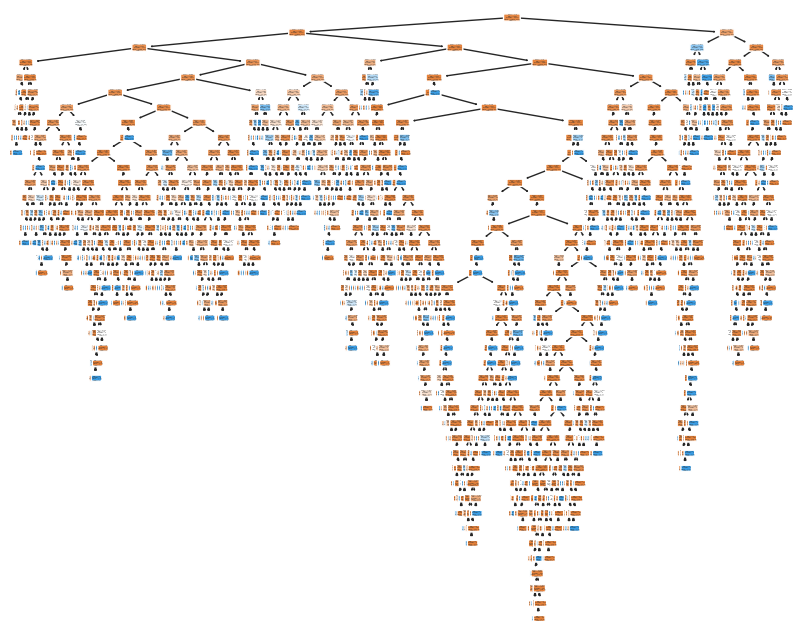

In [ ]:
# Graficamos modelo de árbol de decisión
plt.figure(figsize=(10,8))
plot_tree(Mod1, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)

Arbol de decision con kfold como cross validation (menos adecuado para datos desbalanceados). Vemos que el accuracy da un poco menos que cuando aplicamos validacion cruzada estratificada como en el caso anterior.

In [ ]:
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=300, stratify=y, random_state = 0)

#reseteamos el indice de y_train sino no da
y_train = y_train.reset_index(drop=True)

# Crear modelo de árbol de decisión con todos los paámetros por default
Mod2 = DecisionTreeClassifier()

# Crear el objeto KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)
scores = []

# Iterar sobre los conjuntos de entrenamiento y validación generados por KFold
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento fold
    Mod2.fit(X_train_fold, y_train_fold)

    # Realizar predicciones en el conjunto de validación fold
    y_pred_fold = Mod2.predict(X_val_fold)

    # Calcular la puntuación de rendimiento en el conjunto de validación fold
    score = accuracy_score(y_val_fold, y_pred_fold)
    scores.append(score)

# Calcular la puntuación promedio de rendimiento
mean_score2 = np.mean(scores)
mean_score2

0.950168193945018

In [ ]:
#Calculamos valores predichos por el modelo entrenado con kfold
y_pred = Mod2.predict(X_test)
#Evaluamos el desempeño del modelo con su matriz de confusion
confusion_matrix(y_test,y_pred)

array([[282,   4],
       [  5,   9]])

In [ ]:
# Pasamos como argumento de la matriz de confusión los valores  y_test y los predichos por el modelo
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       286
           1       0.69      0.64      0.67        14

    accuracy                           0.97       300
   macro avg       0.84      0.81      0.83       300
weighted avg       0.97      0.97      0.97       300



## Arbol de decision con datos escalados, cross validation stratifiedkfold y cambio en el parametro de profundidad (k=4) respecto del anterior

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=300, stratify=y, random_state = 0)

#reseteamos el indice de y_train sino no da
y_train = y_train.reset_index(drop=True)

# Vamos a trabajar la función DecisionTreeClassifier de la librería sklearn.tree
# Crear modelo de árbol de decisión con todos los paámetros por default
Mod3 = DecisionTreeClassifier(max_depth=4)

# Se realiza la validación cruzada con StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento fold
    Mod3.fit(X_train_fold, y_train_fold)

    # Realizar predicciones en el conjunto de validación fold
    y_pred_fold = Mod3.predict(X_val_fold)

    # Calcular la puntuación de rendimiento en el conjunto de validación fold
    score = accuracy_score(y_val_fold, y_pred_fold)
    scores.append(score)

# Calcular la puntuación promedio de rendimiento
mean_score3 = np.mean(scores)
mean_score3

0.9645052778099987

# 6 - Random Forrest grid search (no consideramos clases desbalanceadas al hacer cv para minimizar tiempo de computo)

In [ ]:
#se particionan con los datos de x escalados con un conjunto de testeo de 300 registros y manteniendo el balance de las clases de los conjuntos de testeo y prueba
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=300, stratify=y, random_state = 0)

In [ ]:
#importamos las librerias para dividir datos de prueba y entrenamiento,dividir los datos en pliegues (stratified kfolds) y hacer cross validation
#se importa el modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# se crea una instancia del clasificador random forrest con los parametros por defecto
rf = RandomForestClassifier()

In [ ]:
# Definimos los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [10, 20, 30],  # Número de árboles en el bosque
    'max_depth': [None, 5, 10],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV con validación cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy')

In [ ]:
# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 20}


In [ ]:
# Obtener la mejor puntuación de validación cruzada
best_score = grid_search.best_score_
print("Mejor puntuación de validación cruzada:", best_score)

Mejor puntuación de validación cruzada: 0.9669179909523258


In [ ]:
# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el mejor modelo utilizando validación cruzada
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Puntuaciones de validación cruzada:", cv_scores)
print("Puntuación media de validación cruzada:", cv_scores.mean())

Puntuaciones de validación cruzada: [0.9667092  0.96496926 0.96798515 0.96415729 0.9665932 ]
Puntuación media de validación cruzada: 0.9660828210184433


In [ ]:
# Realizar predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

In [ ]:
params1 = best_model.get_params()
print(params1)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
